<h2>Import Libraries and Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
import pickle as pkl

In [2]:
pd.options.display.max_columns = None

In [3]:
data = pd.read_csv("../data/creditcard.csv")
data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
data.duplicated().sum()

1081

In [9]:
data.shape

(284807, 31)

In [10]:
data.drop_duplicates(inplace=True)
data.shape

(283726, 31)

In [11]:
ss = StandardScaler()
data["Amount"] = ss.fit_transform(data['Amount'].to_frame())
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


<Axes: >

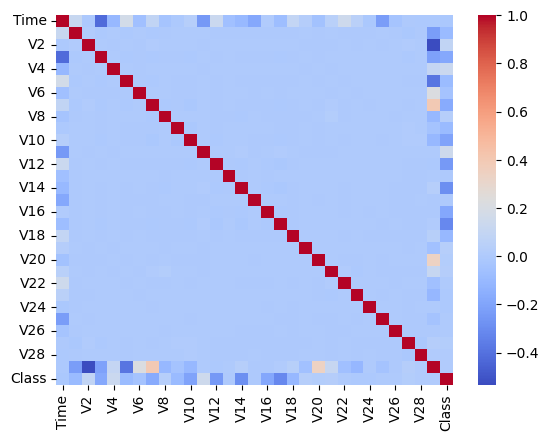

In [12]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')

Class
0    283253
1       473
Name: count, dtype: int64


<Axes: xlabel='Class'>

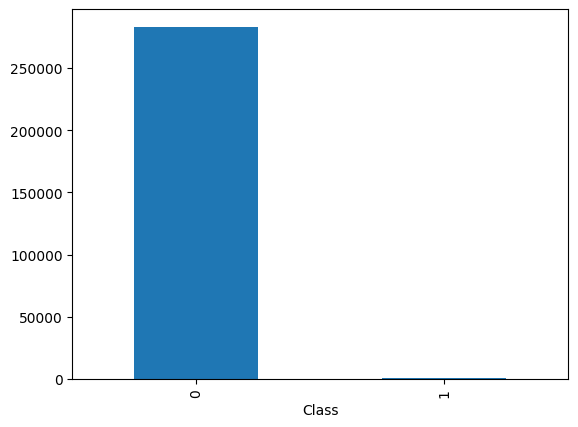

In [13]:
print(data["Class"].value_counts())
data.Class.value_counts().plot(kind = 'bar')

<h2>Train Test Split

In [14]:
X = data.drop('Class', axis =1)
Y = data['Class']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

<h2>Model Training

In [16]:
LR = LogisticRegression()
DTC = DecisionTreeClassifier()
GNB = GaussianNB()
RFC = RandomForestClassifier()

models = [LR, DTC, GNB, RFC]

In [18]:
predictions = dict()

for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    model_name = type(model).__name__

    print(f"-----completed training {model_name}")

    predictions[model_name] = {}

    predictions[model_name]['accuracy_score'] = accuracy_score(y_test, y_pred)
    predictions[model_name]['f1_score'] = f1_score(y_test, y_pred)
    predictions[model_name]['precision_score'] = precision_score(y_test, y_pred)
    predictions[model_name]['recall_score'] = recall_score(y_test, y_pred)



c:\Users\manik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-----completed training LogisticRegression
-----completed training DecisionTreeClassifier
-----completed training GaussianNB
-----completed training RandomForestClassifier


In [71]:
pd.DataFrame(predictions)

,LogisticRegression,DecisionTreeClassifier,GaussianNB,RandomForestClassifier
accuracy_score,0.999070,0.999192,0.993136,0.999614
f1_score,0.693642,0.738636,0.222664,0.862500
precision_score,0.705882,0.738636,0.134940,0.958333
recall_score,0.681818,0.738636,0.636364,0.784091


<Axes: >

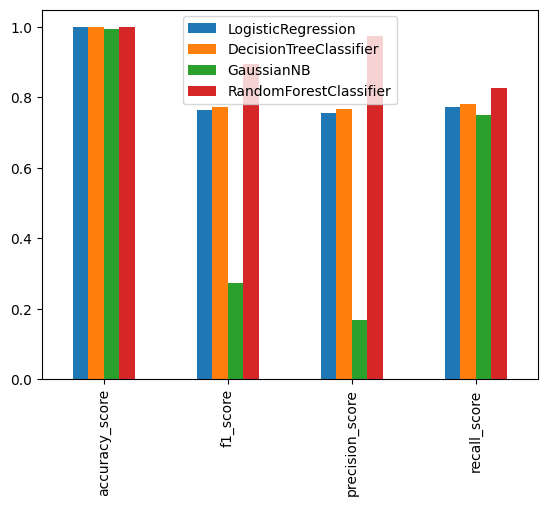

In [19]:
pd.DataFrame(predictions).plot(kind='bar')

<h2>UNDERSAMPLING - Optimising code

In [20]:
normal = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

Under_Sample = normal.sample(fraud.shape[0])

new_data = pd.concat((Under_Sample, fraud))
US_X = new_data.drop('Class',axis = 1)
US_Y = new_data["Class"]

In [21]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(US_X, US_Y, test_size = 0.2, random_state = 5)

In [22]:
US_LR = LogisticRegression()
US_DTC = DecisionTreeClassifier()
US_GNB = GaussianNB()
US_RFC = RandomForestClassifier()

models = [US_LR, US_DTC, US_GNB, US_RFC]

In [23]:
US_predictions = dict()

for model in models:
    model.fit(x_train_new, y_train_new)
    y_pred = model.predict(x_test_new)
    model_name = type(model).__name__

    print(f"------completed training {model_name}")

    US_predictions[model_name] = {}

    US_predictions[model_name]['accuracy_score'] = accuracy_score(y_test_new, y_pred)
    US_predictions[model_name]['f1_score'] = f1_score(y_test_new, y_pred)
    US_predictions[model_name]['precision_score'] = precision_score(y_test_new, y_pred)
    US_predictions[model_name]['recall_score'] = recall_score(y_test_new, y_pred)

c:\Users\manik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------completed training LogisticRegression
------completed training DecisionTreeClassifier
------completed training GaussianNB
------completed training RandomForestClassifier


In [24]:
pd.DataFrame(US_predictions)

,LogisticRegression,DecisionTreeClassifier,GaussianNB,RandomForestClassifier
accuracy_score,0.936842,0.915789,0.857895,0.931579
f1_score,0.936842,0.916667,0.840237,0.930481
precision_score,0.967391,0.936170,1.000000,0.977528
recall_score,0.908163,0.897959,0.724490,0.887755


<Axes: >

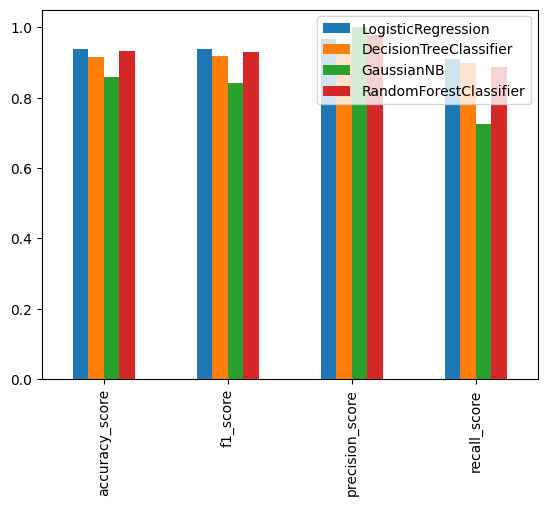

In [25]:
pd.DataFrame(US_predictions).plot(kind = 'bar')

<h2>OverSampling

In [17]:
X.shape

(283726, 30)

In [18]:
x_res, y_res  = SMOTE().fit_resample( X, Y)

In [19]:
x_res

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566501,8439.002542,-0.279104,3.290448,-5.921737,4.851453,-1.333072,-2.489503,-3.855210,1.023421,-1.560091,-6.064368,6.864892,-9.069470,0.429679,-8.810910,-0.154695,-3.910132,-5.200103,-0.758685,0.991915,0.566598,0.707692,-0.067227,0.283081,-0.018175,-1.069036,0.322662,0.697288,0.292307,-0.349333
566502,97093.712921,-17.502060,12.620440,-19.054203,11.191719,-13.610344,-0.263214,-23.289167,-5.110242,-8.318604,-16.241687,5.469696,-13.676303,-0.139045,-7.474109,-0.985221,-8.778901,-15.673278,-5.860524,1.611306,2.465052,-4.346082,2.854108,1.471701,0.355512,-0.245140,0.413570,-3.148180,-0.515828,-0.315546
566503,169350.791396,-0.568988,1.134867,-2.359230,0.517515,-1.039023,-0.072352,-2.191894,1.160008,-0.677029,-3.451806,1.850431,-2.791809,-0.438433,-4.117291,-0.707463,-1.631817,-4.943112,-0.516466,0.290856,0.246829,0.731945,0.792081,0.173391,0.026171,-0.673903,0.485106,0.385318,0.193959,-0.058327
566504,85866.896671,-3.579328,2.620129,-5.571761,3.640875,-4.450483,-0.214489,-4.139744,2.416789,-3.226434,-5.828416,3.398536,-5.706659,0.278266,-5.508007,-0.546795,-5.846840,-11.080271,-3.446725,2.779233,-0.152532,1.019285,0.410458,0.154880,-0.541782,0.166432,-0.149334,0.704570,-0.285967,0.843813


In [20]:
x_train_OS, x_test_OS, y_train_OS, y_test_OS = train_test_split(x_res, y_res)

In [21]:
OS_LR = LogisticRegression()
OS_DTC = DecisionTreeClassifier()
OS_GNB = GaussianNB()
OS_RFC = RandomForestClassifier(max_depth=5)

models = [OS_LR, OS_DTC, OS_GNB, OS_RFC]

In [22]:
OS_predictions = dict()

for model in models:
    model.fit(x_train_OS, y_train_OS)
    y_pred = model.predict(x_test_OS)
    model_name = type(model).__name__

    print(f"------completed training {model_name}")

    OS_predictions[model_name] = {}

    OS_predictions[model_name]['accuracy_score'] = accuracy_score(y_test_OS, y_pred)
    OS_predictions[model_name]['f1_score'] = f1_score(y_test_OS, y_pred)
    OS_predictions[model_name]['precision_score'] = precision_score(y_test_OS, y_pred)
    OS_predictions[model_name]['recall_score'] = recall_score(y_test_OS, y_pred)


c:\Users\manik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------completed training LogisticRegression
------completed training DecisionTreeClassifier
------completed training GaussianNB
------completed training RandomForestClassifier


In [23]:
pd.DataFrame(OS_predictions)

,LogisticRegression,DecisionTreeClassifier,GaussianNB,RandomForestClassifier
accuracy_score,0.971969,0.998298,0.870420,0.966384
f1_score,0.971596,0.998294,0.852000,0.965285
precision_score,0.981412,0.997722,0.988899,0.994426
recall_score,0.961974,0.998867,0.748396,0.937804


<Axes: >

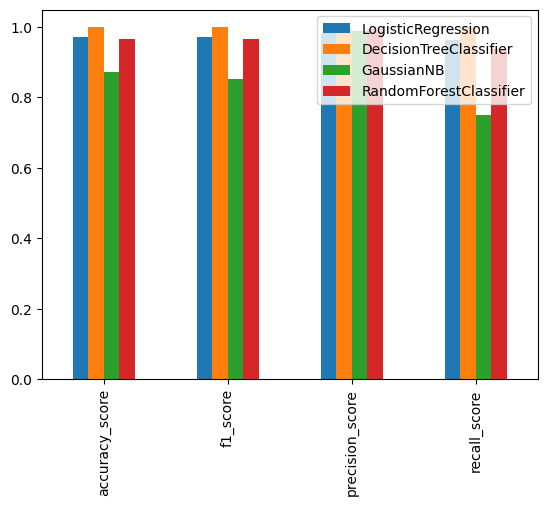

In [24]:
pd.DataFrame(OS_predictions).plot(kind = 'bar')

In [25]:
with open("../Application/Model.pkl", 'wb') as file:
    pkl.dump(OS_RFC,file)